In [3]:
DATA_DIR = 'Z:/knbnk/data/kaisetu'

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread(DATA_DIR+'/01.jpeg', 0)

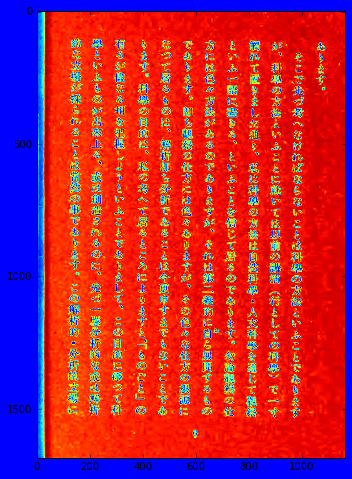

In [8]:
plt.figure(figsize=(10,8), facecolor='blue')
plt.imshow(np.asarray(img))
plt.show()

In [6]:
print(img.dtype)
print(img.shape)

uint8
(1685, 1164)


In [7]:
print(img[300, 500])

216


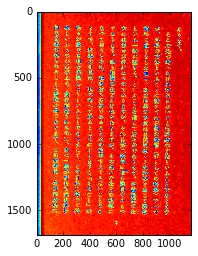

In [8]:
plt.imshow(np.array(img))

In [14]:
#ちなみに、サイズを小さくするのはresizeで簡単にできるが引数の順序に注意
h, w =  img.shape
half_img = cv2.resize(img, (w//2, h//2))
cv2.imwrite(DATA_DIR+'/img_half_size.jpeg', half_img)

True

In [15]:
half_bw_not = cv2.bitwise_not(half_img)
cv2.imwrite(DATA_DIR+'/half_img_bitwise_not.jpeg', half_bw_not)

True

In [16]:
max_value = 255
thresh_under = 55
ret, half_bw_not_tozero = cv2.threshold(half_bw_not, thresh_under, max_value, cv2.THRESH_TOZERO)
cv2.imwrite(DATA_DIR+'/half_img_bitwise_not_tozero_55.jpeg', half_bw_not_tozero)

True

In [17]:
bw_not = cv2.bitwise_not(half_img)
cv2.imwrite(DATA_DIR+'/half_img_bitwise_not.jpeg', bw_not)

True

In [18]:
max_value = 255
thresh_under = 55
ret, bw_not_tozero = cv2.threshold(bw_not, thresh_under, max_value, cv2.THRESH_TOZERO)
cv2.imwrite(DATA_DIR+'/img_bitwise_not_tozero_55.jpeg', bw_not_tozero)

True

In [19]:
# ちなみに、
print(cv2.THRESH_TOZERO)

3


In [20]:
max_value = 255
thresh_under = 200
ret, thresh_trunc = cv2.threshold(img, thresh_under, max_value, cv2.THRESH_TRUNC)
cv2.imwrite(DATA_DIR+'/arimasu_thresh_trunc_200.jpeg', thresh_trunc)

True

In [21]:
max_value = 255
thresh_under = 200
ret, thresh_otsu = cv2.threshold(img, thresh_under, max_value, cv2.THRESH_OTSU)
cv2.imwrite(DATA_DIR+'/arimasu_thresh_otsu_200.jpeg', thresh_otsu)

True

In [29]:
max_value = 255
thresh_under = 200
ret, thresh = cv2.threshold(img, thresh_under, max_value, cv2.THRESH_BINARY_INV)
cv2.imwrite(DATA_DIR+'/arimasu_thresh_b_inv_200.jpeg', thresh)

True

In [22]:
max_value = 255
thresh_under = 200
ret, thresh_trunc_binary = cv2.threshold(thresh_trunc, thresh_under, max_value, cv2.THRESH_BINARY_INV)
cv2.imwrite(DATA_DIR+'/thresh_trunc_200_binary_inv_200.jpeg', thresh_trunc_binary)

True

582
55421


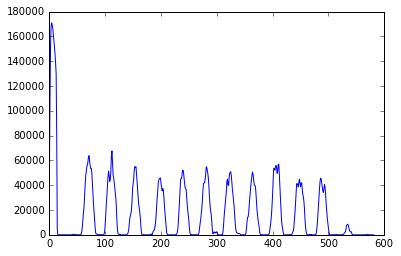

In [23]:
hist = np.sum(bw_not_tozero, axis=0)
print(len(hist))
print(hist[0])
plt.plot(hist)
plt.savefig(DATA_DIR+'/hist_bw_not_to_zero.jpeg')

In [24]:
print(hist[0])
print(hist.dtype)
print(hist[0].dtype)
print(isinstance(hist[0],np.uint32))

55421
uint32
uint32
True


In [25]:
import classes.knutil as ku

In [26]:
letters = ku.get_range_list(hist, 300)
print(letters)

[[0, 14], [42, 42], [46, 46], [57, 86], [98, 126], [140, 165], [182, 183], [185, 211], [228, 252], [267, 301], [311, 342], [352, 377], [393, 419], [435, 461], [478, 501], [527, 542], [569, 569]]


In [80]:
# 上のやりかただと、noise も行と認識してしまっているので
# 幅の狭すぎる行と、ページの両端にかかるものは削除する
letters = list(filter(lambda l:l[1] - l[0] > 10, letters))
letters = list(filter(lambda l:l[0] is not 0, letters))
print(letters)

[[57, 86], [98, 126], [140, 165], [185, 211], [228, 252], [267, 301], [311, 342], [352, 377], [393, 419], [435, 461], [478, 501], [527, 542]]


In [27]:
# 上の結果に従って画像を行ごとに分割してみる
gyou_imgs = []
for i, gyou in enumerate(letters):
    gyou_imgs.append(bw_not_tozero[:, gyou[0]:gyou[1]])
    cv2.imwrite(DATA_DIR+"/gyou_{0}.jpeg".format(i), gyou_imgs[-1])

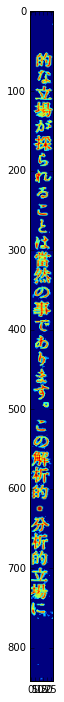

In [29]:
plt.figure(figsize=(6,12))
plt.imshow(gyou_imgs[3])

In [30]:
# gyou_img のヒストグラムもとってみる
hist_vs = []
for i in range(0,12):
    hist_vs.append(np.sum(gyou_imgs[i], axis=1))

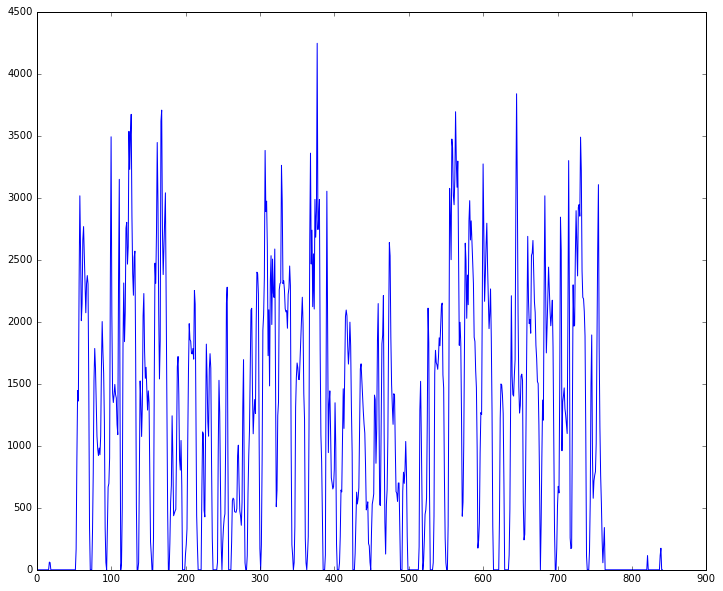

In [31]:
# 一つ示すと
plt.figure(figsize=(12,10))
plt.plot(hist_vs[3])

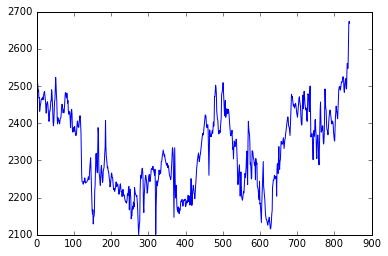

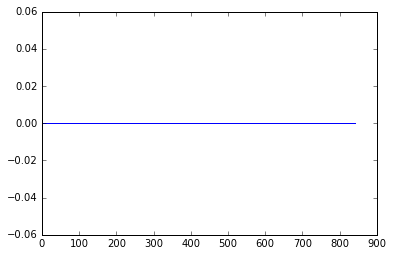

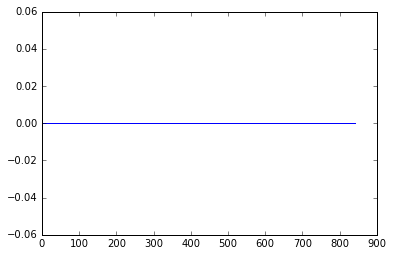

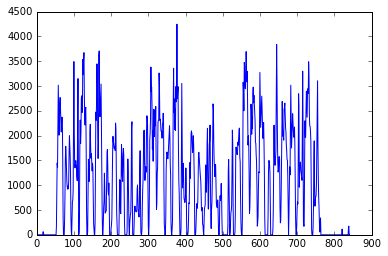

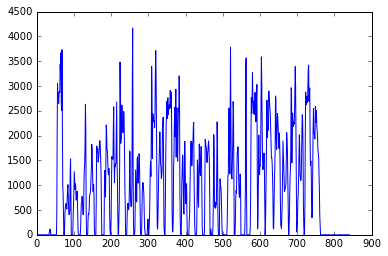

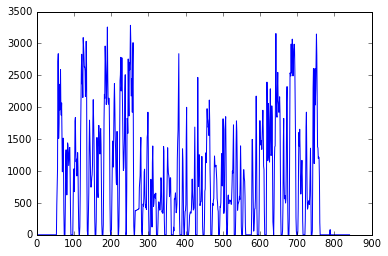

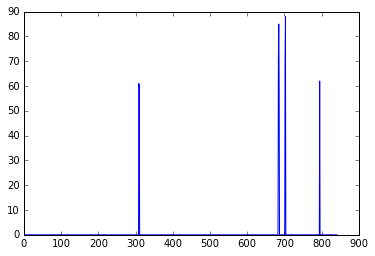

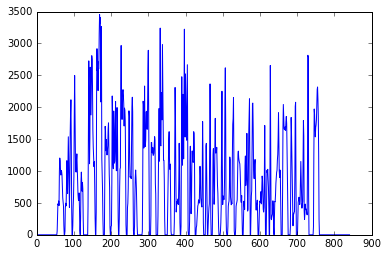

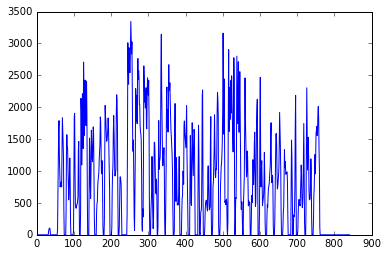

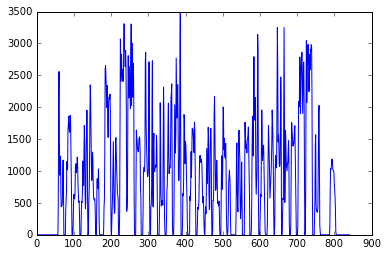

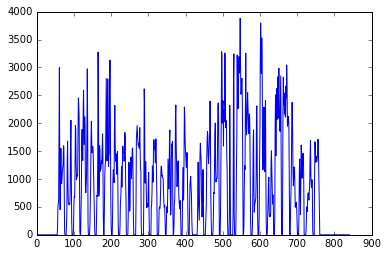

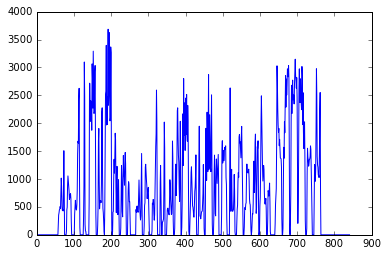

In [32]:
for i in range(0,12):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(hist_vs[i])
    plt.savefig(DATA_DIR+"/hist_v_{0}.jpeg".format(i))

In [33]:
hist_0 = ku.get_range_list(hist_vs[0], 10)

In [34]:
print(hist_0)

[[0, 841]]


In [35]:
# 一度、この結果で画像を切り取ってみると
moji_imgs = []
for i, moji in enumerate(hist_0):
    moji_imgs.append(gyou_imgs[0][moji[0]:moji[1], :])
    cv2.imwrite(DATA_DIR+"/gyou_0_moji_{0}.jpeg".format(i), moji_imgs[-1])

In [36]:
# 上のやりかただと、noise も行と認識してしまっているので
# 幅の狭すぎる行と、ページの両端にかかるものは削除する
letters = list(filter(lambda l:l[1] - l[0] > 10, letters))
letters = list(filter(lambda l:l[0] is not 0, letters))
print(letters)

[[57, 86], [98, 126], [140, 165], [185, 211], [228, 252], [267, 301], [311, 342], [352, 377], [393, 419], [435, 461], [478, 501], [527, 542]]


In [56]:
plt.plot?

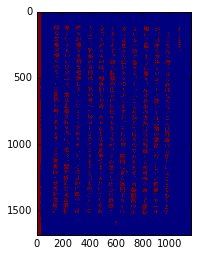

In [9]:
plt.imshow(np.array(thresh))

In [10]:
bubun = img[80:330, 1030:1130]
th_bubun = thresh[80:330, 1030:1130]

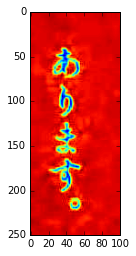

In [11]:
plt.imshow(np.array(bubun))

In [12]:
cv2.imwrite(DATA_DIR+'/arimasu.jpeg', bubun)

True

In [13]:
cv2.imwrite(DATA_DIR+'/arimasu_thresh.jpeg', th_bubun)

True

uint8
(250, 100)


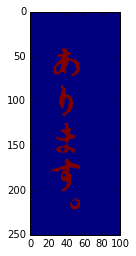

In [129]:
plt.imshow(np.array(th_bubun))
print(th_bubun.dtype)
print(th_bubun.shape)

In [14]:
def blur(img):
    filtered = cv2.GaussianBlur(img, (11, 11), 0)
    return filtered

In [15]:
bl_bubun = blur(bubun)

In [16]:
cv2.imwrite(DATA_DIR+'/arimasu_blur.jpeg', bl_bubun)

True

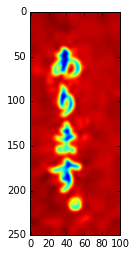

In [125]:
plt.imshow(np.array(bl_bubun))

In [17]:
ret, bl_thresh = cv2.threshold(bl_bubun, thresh_under, max_value, cv2.THRESH_BINARY_INV)

True

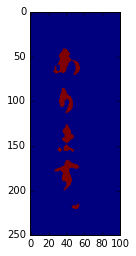

In [18]:
plt.imshow(np.array(bl_thresh))
cv2.imwrite(DATA_DIR+'/arimasu_blur_thresh.jpeg', bl_thresh)

In [2]:
im2, contours, hierarchy = cv2.findContours(th_bubun, cv2.RETR_LIST, 2)
print(im2.dtype)
print(im2.shape)
plt.imshow(np.array(im2))

NameError: name 'cv2' is not defined

In [22]:
print(len(contours))

9


In [1]:
imgs = []
for i in range(0, len(contours)):
    imgs.append(th_bubun.copy())
    cv2.drawContours(imgs[i], contours, i, (255, 255, 255), 3)
    plt.subplot(1,len(contours),i+1)
    plt.imshow(imgs[i])
    cv2.imwrite(DATA_DIR+"/arimasu_thresh_with_contour_{0}.jpeg".format(i), imgs[i])

NameError: name 'contours' is not defined